In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plot

In [2]:
import chart_studio.plotly.plotly as plotly
from chart_studio.plotly import iplot 
import cufflinks as cf
cf.set_config_file(offline=False, world_readable=True)
import plotly.express as px

In [3]:
file_name_bbc = '../BBC_reading/exсel_files/bbc_scraping.xlsx'
file_name_nz = '../BBC_reading/exсel_files/zn_ua_scraping.xlsx'
file_name_csv = '../report/report2.csv'

csv_final_report = pd.read_csv(file_name_csv)
excel_bbc_texts = pd.read_excel(file_name_bbc, index_col=0)
excel_nz_texts = pd.read_excel(file_name_nz, index_col=0)

In [4]:
csv_final_report.head

<bound method NDFrame.head of      file_code  pass  is_fail_doc  \
0        bbc_0     1            0   
1        bbc_0     1            0   
2        bbc_0     1            0   
3        bbc_0     1            0   
4        bbc_0     1            0   
...        ...   ...          ...   
9706    zn_842     1            0   
9707    zn_842     1            0   
9708    zn_843     1            0   
9709    zn_843     1            0   
9710    zn_843     1            0   

                                          category_name  relevancy  \
0                         Top/politics/healthcarepolicy        1.0   
1     Top/politics/healthcarepolicy/quarntine_streng...        1.0   
2                                            Top/events        1.0   
3                          Top/events/onlinetransformed        1.0   
4                              Top/economy/coronacrisis        1.0   
...                                                 ...        ...   
9706                               

In [5]:
excel_bbc_texts.head

<bound method NDFrame.head of            Date                       Author  Main_Topics  \
0    22/03/2020                          NaN     Здоров'я   
1    22/03/2020                          NaN     Здоров'я   
2    22/03/2020                          NaN     Здоров'я   
3    22/03/2020              Ольга Паламарюк     Здоров'я   
4    22/03/2020               BBC Моніторинг     Здоров'я   
..          ...                          ...          ...   
866  12/05/2020  Говард Мусто і Сем Проффітт  Коронавірус   
867  13/05/2020                          NaN  Коронавірус   
868  13/05/2020                          NaN  Коронавірус   
869  13/05/2020                          NaN  Коронавірус   
870  13/05/2020                          NaN  Коронавірус   

                                                 Topic  \
0    Надія є: п'ять причин порадіти під час пандемі...   
1           Маски: щоб захистити інших, а не вас - МОЗ   
2       Коронавірус: як у світі запроваджують карантин   
3    

In [6]:
excel_nz_texts.head

<bound method NDFrame.head of             Date  Author Main_Topics  \
0     05/04/2020     NaN    Політика   
1     05/04/2020     NaN    Політика   
2     05/04/2020     NaN    Політика   
3     05/04/2020     NaN    Політика   
4     05/04/2020     NaN    Політика   
...          ...     ...         ...   
3026  14/05/2020     NaN     Україна   
3027  14/05/2020     NaN     Україна   
3028  14/05/2020     NaN     Україна   
3029  14/05/2020     NaN     Україна   
3030  14/05/2020     NaN     Україна   

                                                  Topic  \
0     Постпред України в ООН розповів, як Росія пере...   
1     З початку року в Донбасі 12 осіб загинули від ...   
2     Людина Ахметова стала позаштатним радником пре...   
3          НАБУ завершило розслідування справи Гримчака   
4                           НАБУ допитало Дениса Єрмака   
...                                                 ...   
3026  На Закарпатті обрушився кінотеатр: з-під завал...   
3027  COVID-19 до

In [7]:
name_colums_for_new_csv = ['file_code', 'class', 'date']
new_csv = pd.DataFrame(zip(csv_final_report.file_code, csv_final_report.category_name, csv_final_report.date), columns=name_colums_for_new_csv)

In [8]:
new_csv.head

<bound method NDFrame.head of      file_code                                              class  \
0        bbc_0                      Top/politics/healthcarepolicy   
1        bbc_0  Top/politics/healthcarepolicy/quarntine_streng...   
2        bbc_0                                         Top/events   
3        bbc_0                       Top/events/onlinetransformed   
4        bbc_0                           Top/economy/coronacrisis   
...        ...                                                ...   
9706    zn_842                                       Top/politics   
9707    zn_842  Top/politics/healthcarepolicy/quarntine_streng...   
9708    zn_843                                 Top/health/recover   
9709    zn_843                           Top/health/dissemination   
9710    zn_843                                   Top/technologies   

                      date  
0     11May2014 11:15:36.0  
1     11May2014 11:15:36.0  
2     11May2014 11:15:36.0  
3     11May2014 11:15:36.

In [9]:
def preparation():
    
    for index in range(len(csv_final_report)):
        source_name = (re.findall('zn|bbc',new_csv.loc[index][0]))[0]
        count_in_table = re.findall('_\d{0,10}', new_csv.loc[index][0])
        count_in_table = int(count_in_table[0].replace('_', ''))

        if source_name == 'bbc':
            new_csv.loc[index][2] = pd.to_datetime(excel_bbc_texts.loc[count_in_table]['Date'], format='%d/%m/%Y', dayfirst=True)
        elif source_name == 'zn':
            new_csv.loc[index][2] = pd.to_datetime(excel_nz_texts.loc[count_in_table]['Date'], format='%d/%m/%Y', dayfirst=True)
    
    my_classes = list(set(new_csv['class']))
    len_my_classes = len(my_classes)
    
    return my_classes,len_my_classes

In [10]:
my_classes, len_my_classes = preparation()
my_classes

['Top/science/existeddrugs',
 'Top/science',
 'Top/events',
 'Top/economy/coronacrisis',
 'Top/politics/healthcarepolicy/transport',
 'Top/society/potentialdeath',
 'Top/science/developingvaccine',
 'Top/society/potentialdeathhisteria',
 'Top/politics/healthcarepolicy/quarntine_strengthening',
 'Top/health/illness',
 'Top/society/producthisteria',
 'Top/events/coronacanceledevents',
 'Top/coronavirus',
 'Top/health',
 'Top/politics/healthcarepolicy/entertaiment',
 'Top/society/familytroubles',
 'Top/technologies/developingofequipment',
 'Top/politics/healthcarepolicy/education',
 'Top/society',
 'Top/economy/coronajobloss',
 'Top/science/developingnewdrugs',
 'Top/economy/crisis',
 'Top/politics/healthcarepolicy/safetysteps',
 'Top/technologies',
 'Top/health/recover',
 'Top/events/onlinetransformed',
 'Top/politics/criminal',
 'Top/economy',
 'Top/economy/coronaimport',
 'Top/health/dissemination',
 'Top/economy/coronabusiness',
 'Top/politics',
 'Top/society/death',
 'Top/politics/he

In [11]:
def create_result_table(name_colums_for_new_csv, my_classes, days_period, first_day, last_day):
    
    all_source_for_bars = pd.DataFrame(columns=my_classes)
    dates_period = pd.DataFrame(columns=my_classes)
    
    last_day = pd.to_datetime(last_day,format='%d/%m/%Y')
    start_period = pd.to_datetime(first_day,format='%d/%m/%Y')
    period_time = pd.Timedelta(days=days_period)
    bool_parametr = True
    
    while bool_parametr:
        end_period = start_period + period_time
        
        if end_period >= last_day:
            bool_parametr = False
            end_period = last_day
            break
        
        counts_dateFrame = pd.DataFrame(columns=name_colums_for_new_csv)
        counts_dates = pd.DataFrame(columns=['start_period','end_period'])
        counts_list = np.array([])
        counts_dates_array = np.array([start_period, end_period])
        
        counts_dates_temp = pd.DataFrame([counts_dates_array],columns=['start_period','end_period']) 
        counts_dates = counts_dates.append(counts_dates_temp, ignore_index=True)
        
        for index,name_class in enumerate(my_classes):

            counts_dateFrame = new_csv[(new_csv['class'] == name_class) & (start_period <= new_csv['date']) & (new_csv['date'] <= end_period)]
            # print(counts_dateFrame.head)
            count = len(counts_dateFrame)

            # print(f"count\t{count}\nindex\t{index}")
            counts_list = np.append(counts_list, count)
        
        all_summ = np.sum(counts_list)
        counts_list = (counts_list / all_summ ) * 100
        
        temp_count_table = pd.DataFrame([counts_list],columns=my_classes) 
        all_source_for_bars = all_source_for_bars.append(temp_count_table, ignore_index=True)
        
        start_period = end_period + pd.Timedelta(days=1)
    
    return all_source_for_bars, counts_dates

In [12]:
days_period = 3 
first_day = '03/03/2020' 
last_day = '12/05/2020'
all_source_bars,dates = create_result_table(name_colums_for_new_csv, my_classes, days_period, first_day, last_day)

In [13]:
all_source_bars.head

<bound method NDFrame.head of     Top/science/existeddrugs  Top/science  Top/events  \
0                   0.000000     0.000000    0.000000   
1                   1.818182     5.454545   16.363636   
2                   0.000000     1.176471   22.352941   
3                   0.000000     0.660066   12.211221   
4                   0.000000     2.564103    7.371795   
5                   0.385356     1.926782    5.973025   
6                   0.639659     2.558635    8.955224   
7                   1.328904     1.550388    8.970100   
8                   0.928505     2.042711   13.834726   
9                   0.788644     1.419558   12.302839   
10                  0.656814     1.149425   13.300493   
11                  0.671141     1.677852   13.255034   
12                  0.345622     2.188940   14.170507   
13                  0.167224     1.839465   16.220736   
14                  0.294985     1.917404   16.371681   
15                  0.539568     1.978417   15.107914   
1

In [14]:
res_without_dates = all_source_bars.drop([0], axis=0)
res_without_dates.head

<bound method NDFrame.head of     Top/science/existeddrugs  Top/science  Top/events  \
1                   1.818182     5.454545   16.363636   
2                   0.000000     1.176471   22.352941   
3                   0.000000     0.660066   12.211221   
4                   0.000000     2.564103    7.371795   
5                   0.385356     1.926782    5.973025   
6                   0.639659     2.558635    8.955224   
7                   1.328904     1.550388    8.970100   
8                   0.928505     2.042711   13.834726   
9                   0.788644     1.419558   12.302839   
10                  0.656814     1.149425   13.300493   
11                  0.671141     1.677852   13.255034   
12                  0.345622     2.188940   14.170507   
13                  0.167224     1.839465   16.220736   
14                  0.294985     1.917404   16.371681   
15                  0.539568     1.978417   15.107914   
16                  0.126422     3.666245   15.170670   



In [16]:

plotly.sign_in('pavloboiko', 'az5LvJJAnnHGiWxie4Rq')


ax = res_without_dates.iplot(kind='bar', histnorm='percent',
    barmode='overlay', xTitle='period',
                  yTitle='percent', title='Coronovirus')


ax

In [19]:
res_without_dates.iplot(kind='bar', histnorm='percent',
    barmode='overlay', xTitle='period',
                  yTitle='percent', title='Coronovirus')

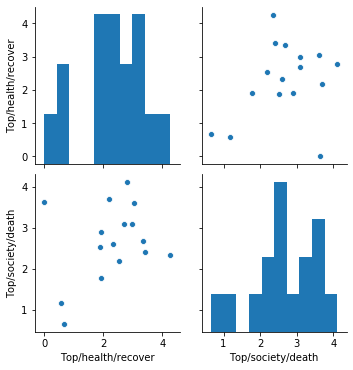

In [22]:

import seaborn as sns
sns_plot = sns.pairplot(res_without_dates[['Top/health/recover', 'Top/society/death']])
sns_plot.savefig('pairplot.png')